# Data from HTML tables: L.A. County covid cases

In [1]:
import pandas as pd

#### URL for 2020-2021 CDCR Contraband Data

In [2]:
url2020 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSbuKwu1W-70s-ESxexRnP7YADFjF2ONe9_ottJ8jVwWC7lJAh7jo01yEhbkkPHD6qXGeP_pyT9C-h-/pubhtml'

In [3]:
url2021 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSHQMNOzGdTgSl_T2TxrXXqWFw6FGk9R77BkBhguBUh3-EZ0GgwNd-kV7zc4fIbj6fCFX7-6dfbIXqJ/pubhtml'

#### Read the two contraband case tables into dataframes

In [9]:
cases_df_2020 = pd.read_html(url2020, header=3, index_col=0)[0]
cases_df_2020 = cases_df_2020.set_index('Incidents', drop=True)
cases_df_2021 = pd.read_html(url2021, header=3, index_col=0)[0]
cases_df_2021 = cases_df_2021.set_index('Incidents', drop=True)

#### Look at the dataframes

In [10]:
cases_df_2020.head(5)

,1/1/2020,2/1/2020,3/1/2020,4/1/2020,5/1/2020,6/1/2020,7/1/2020,8/1/2020,9/1/2020,10/1/2020,11/1/2020,12/1/2020
Incidents,,,,,,,,,,,,
Drug Paraphernalia,52,42,42,44,43,41,34,28,39,48,36,19
Controlled Substances/Stimulants/Sedatives,265,259,252,316,312,316,264,267,294,324,258,245
Amphetamine,6,3,6,7,8,22,31,9,31,28,26,47
Amphetamine Quantity,62,1003,107,91,185,289,710,210,750,1044,340,21723
Cocaine,1,2,0,3,1,3,4,2,4,2,0,1


In [11]:
cases_df_2021.head(5)

,1/1/2021,2/1/2021,3/1/2021,4/1/2021,5/1/2021,6/1/2021,7/1/2021,8/1/2021,9/1/2021,10/1/2021,11/1/2021,12/1/2021,1/1/2022
Incidents,,,,,,,,,,,,,
Controlled Substances/Stimulants/Sedatives,230,284,328,258,256,280,236,245,306,274,289,263,195
Amphetamine,17,23,29,18,17,15,8,14,14,18,15,9,13
Amphetamine Quantity,415,375,1754,502,16570,116,155,313,568,311,792,130,423
Barbiturates,0,1,0,1,0,0,0,0,0,0,0,0,0
Barbiturates Quantity,0,0,0,5,0,0,0,0,0,0,0,0,0


---

In [40]:
# merge 2020 and 2021 tables and do some data cleaning
cases_df_all = cases_df_2020.merge(cases_df_2021, how='left', left_index=True, right_index=True) # combine rows
cases_df_all = cases_df_all.T # transpose
cases_df_all.index = pd.to_datetime(cases_df_all.index) # turn the indices into datetimes

In [41]:
cases_df_all

Incidents,Drug Paraphernalia,Controlled Substances/Stimulants/Sedatives,Amphetamine,Amphetamine Quantity,Cocaine,Cocaine Quantity,Codeine,Codeine Quantity,Heroin,Heroin Quantity,Marijuana,Marijuana Quantity,Methamphetamine,Methamphetamine Quantity,Morphine,Morphine Quantity,Synthetic Marijuana - Spice,Synthetic Marijuana - Spice Quantity,Other Controlled Substances/Stimulants/Sedatives
2020-01-01,52,265,6,62,1,0,1,0,87,3069,79,1850,62,1218,11,17,5,2009,73
2020-02-01,42,259,3,1003,2,1,0,0,103,1584,78,13331,67,1472,7,16,9,2008,54
2020-03-01,42,252,6,107,0,0,1,0,86,1169,76,3320,63,924,2,9,4,15,68
2020-04-01,44,316,7,91,3,8,1,0,102,1281,63,1505,90,1700,2,2,9,259,91
2020-05-01,43,312,8,185,1,40,0,0,91,689,57,1025,70,1091,3,20,16,76,117
2020-06-01,41,316,22,289,3,25,0,0,69,382,64,1328,57,693,0,0,10,85,110
2020-07-01,34,264,31,710,4,23,0,0,59,4943,41,2713,52,135559,3,13,26,522,75
2020-08-01,28,267,9,210,2,1001,0,0,55,831,52,1357,78,2071,1,1,21,320,75
2020-09-01,39,294,31,750,4,12,1,11,54,25360,53,1387,72,1892,2,3,29,83,73
2020-10-01,48,324,28,1044,2,2,0,0,56,477,63,1840,105,9745,2,28,12,14,84


#### How many incidents in 2020?

In [42]:
cases_df_all[
    (cases_df_all.index >= '2020-01-01') &
    (cases_df_all.index < '2021-01-01')
].sum()

Incidents
Drug Paraphernalia                                     468
Controlled Substances/Stimulants/Sedatives            3372
Amphetamine                                            224
Amphetamine Quantity                                 26514
Cocaine                                                 23
Cocaine Quantity                                      1115
Codeine                                                  6
Codeine Quantity                                        21
Heroin                                                 835
Heroin Quantity                                      40564
Marijuana                                              723
Marijuana Quantity                                   36281
Methamphetamine                                        891
Methamphetamine Quantity                            169521
Morphine                                                36
Morphine Quantity                                     2110
Synthetic Marijuana - Spice                   

#### What's the trend for Methamphetamine cases during 2020-2022?

<AxesSubplot:>

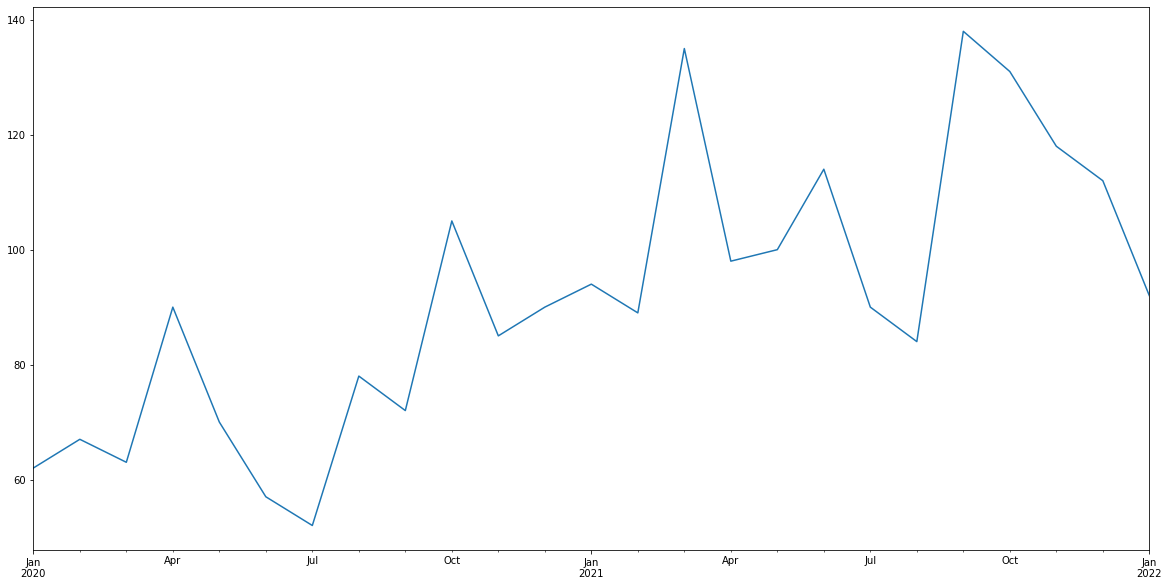

In [49]:
cases_df_all['Methamphetamine'].plot(figsize=(20,10))

#### How many deaths in Los Angeles - Del Rey? Encino?

In [ ]:
cases_df [cases_df["place"].str.contains('Del Rey')]

In [ ]:
cases_df[cases_df['place'].str.contains("Encino")]

#### How many cases in places outside Los Angeles? [Hint](https://www.google.com/search?q=Python+pandas+string+does+not+contain&oq=Python+pandas+string+does+not+contain)

In [ ]:
new_cases_df= cases_df[~cases_df["place"].str.contains("Los Angeles")]

In [ ]:
new_cases_df

#### Which large cities/neighborhoods have the highest rates? 

In [ ]:
cases_df[cases_df["cases"]>10000].sort_values('death_rates', ascending=False).head()

In [ ]:
cases_df[cases_df["cases"]>10000].sort_values('case_rates', ascending=False).head()

---

#### Bonus: Create a true/false column for Los Angeles

In [ ]:
cases['is_la'].str.contains('Los Angeles')

In [ ]:
cases.sample(10)

#### Bonus: Were there more cases in the county vs. the city of Los Angeles? 

In [ ]:
cases_df [cases_df['is_la'] == False] ['cases'].sum()

#### Discussion: How would you determine whether there were disproportionately more cases in the county? 